# Shannon's Theorem and Probabilistic Noise

So far, we have looked at codes from the **Hamming perspective**, where we assume a "worst-case" scenario: up to a certain number of errors (*t*) will occur, and our code must be able to handle it. This is an adversarial model.

This notebook introduces a different perspective. Instead of a worst-case scenario, Shannon modeled noise **stochastically**, or **probabilistically**. He viewed communication as a random process where errors happen with a certain likelihood, not with a guarantee.

## The Communication Process

Shannon's framework separates the problem of communication into two distinct parts, as shown in the general model below.

<img src="./imgs/image_channel_diagram.png" alt="Generic model of a communication system" width="600"/>

1. **Source Coding (Compression):** This part deals with the message itself before noise is a factor. The goal of the **Source Encoder** is to remove redundancy from the original data to make it as compact as possible. The theoretical limit of this compression is related to the **entropy** of the source. Think of this as zipping a file.

2. **Channel Coding (Error Correction):** This is the part we've been focused on. After the message is compressed, the **Channel Encoder** adds "smart" redundancy back in. This redundancy is not a simple repetition; it's structured (like in an RS code) to protect the data from errors that occur when it's sent over the noisy **Channel**.

Shannon showed that these two problems can be studied separately. For the rest of this chapter, we will ignore source coding and focus exclusively on **channel coding** in a world where the noise is random.

## Shannon's Noise Models: From BSC to Channel Capacity

Shannon's framework begins with a formal model of a noisy channel. It consists of three key parts:

1. **Input alphabet** $\,\mathcal{X}\,$ — the set of symbols we can send.
2. **Output alphabet** $\,\mathcal{Y}\,$ — the set of symbols we might receive.
3. **Transition matrix** $\,M\,$ — contains crossover probabilities. The entry $M(x,y)$ is the probability of receiving symbol $y$ given that we sent symbol $x$, written as $\Pr(y \mid x)$.

Channels are typically assumed to be **memoryless**, meaning the noise on each transmitted symbol is an independent event.

### Common Stochastic Channels

Let's look at a specific channel model.

#### Binary Symmetric Channel (BSC)

This is the most fundamental model. The input and output alphabets are both binary:
$\,\mathcal{X} = \mathcal{Y} = \{0,1\}.$

- A bit is transmitted correctly (0 stays 0, 1 stays 1) with probability $1 - p$.
- A bit is flipped (0 becomes 1, 1 becomes 0) with probability $p$. This $p$ is the **crossover probability**.

The channel can be visualized as:

<img src="./imgs/image_bsc.png" alt="Binary Symmetric Channel Diagram" width="300"/>

The corresponding transition matrix is:

$$
M = \begin{pmatrix}
1 - p & p \\
p & 1 - p
\end{pmatrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_bsc(codeword, p):
    """Simulates passing a codeword through a Binary Symmetric Channel."""
    received_word = []
    for bit in codeword:
        if np.random.rand() < p:
            # The bit is flipped
            received_word.append(1 - bit)
        else:
            # The bit is transmitted correctly
            received_word.append(bit)
    return np.array(received_word)

# Example
original_codeword = np.array([0, 1, 0, 1, 1, 1, 0])
crossover_prob = 0.1
received_codeword = simulate_bsc(original_codeword, crossover_prob)

print(f"Original codeword: {original_codeword}")
print(f"Received codeword: {received_codeword} (after BSC with p={crossover_prob})")

Original codeword: [0 1 0 1 1 1 0]
Received codeword: [0 1 1 1 1 0 0] (after BSC with p=0.1)


#### q-ary Symmetric Channel (qSC)

This model generalizes the BSC to an alphabet of any size $q \ge 2$.

- A symbol is transmitted correctly with probability $1 - p$.
- If an error occurs, the original symbol is transformed into any of the other $q - 1$ incorrect symbols with equal probability $\,\frac{p}{q-1}$.

---

#### Binary Erasure Channel (BEC)

In the BEC, bits are never flipped, but they can be completely lost or “erased”.

- The input alphabet is $\mathcal{X} = \{0,1\}$.
- The output alphabet is $\mathcal{Y} = \{0,1,?\}$, where “?” denotes an **erasure**.
- A bit is transmitted correctly with probability $1 - a$.
- A bit is erased with probability $a$.

<img src="./imgs/image_bec.png" alt="Binary Erasure Channel Diagram" width="200"/>

---

#### Binary Input Additive Gaussian White Noise (BIAGWN)

This is a crucial model for **continuous** channels, like radio waves.

- The input is binary, typically $\mathcal{X}=\{-1,1\}$.
- The output $\mathcal{Y}$ is the set of all real numbers ($\mathbb{R}$).
- The channel adds random noise drawn from a Gaussian (Normal) distribution to the input.  
  The probability density of receiving $y$ given $x$ is
  $$
  \Pr(y \mid x) \;=\; \frac{1}{\sigma\sqrt{2\pi}} \exp\!\left(-\frac{(y-x)^2}{2\sigma^2}\right).
  $$

### Vanishing Error Probability

In the Hamming model, we could guarantee correction for up to $t$ errors. In a stochastic model, this is impossible. There is always a tiny, non-zero probability that extreme noise could flip more than $t$ bits and make one codeword look like another.

So, the goal shifts. We no longer aim for a 100% guarantee. Instead, we want to design codes where the probability of a decoding error can be made arbitrarily small. For a code of length $n$, we want the decoding error probability $P(\text{error})$ to approach $0$ as $n \to \infty$.

---

### Shannon's Noisy-Channel Coding Theorem 

This leads us to one of the most important results in information theory. Shannon’s theorem provides a sharp, definitive answer to the question of how much information can be sent reliably over a noisy channel.

The theorem introduces the concept of Channel Capacity ($C$). This is a single number, a fundamental property of a channel (like its BSC crossover probability $p$), which represents the maximum rate at which information can be transmitted over that channel with arbitrarily low error probability.

Shannon’s Theorem states:

1. Achievability ($R < C$): For any rate $R$ less than the channel capacity $C$, there exists a coding scheme that allows us to communicate with a probability of error that can be made arbitrarily close to zero (by using long enough codewords).

2. Converse ($R > C$): For any rate $R$ greater than the channel capacity $C$, it is impossible to achieve reliable communication. The probability of error will always be bounded away from zero, no matter how clever our coding scheme is.

This theorem establishes a fundamental speed limit for communication. For the BSC with crossover probability $p$, the capacity is given by $C = 1 - H(p)$, where $H(p)$ is the binary entropy function.

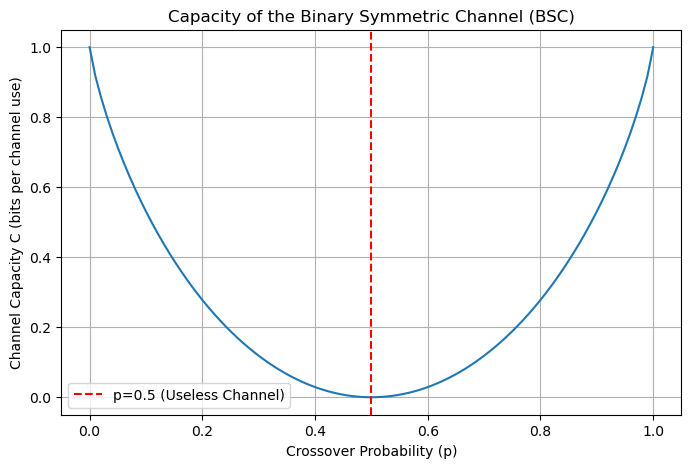

In [2]:
def binary_entropy(p):
    """Calculates the binary entropy H(p)."""
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def bsc_capacity(p):
    """Calculates the capacity of a BSC with crossover probability p."""
    return 1 - binary_entropy(p)

# --- Plotting the Capacity ---
p_values = np.linspace(0.0, 1.0, 100)
capacities = [bsc_capacity(p) for p in p_values]

plt.figure(figsize=(8, 5))
plt.plot(p_values, capacities)
plt.title("Capacity of the Binary Symmetric Channel (BSC)")
plt.xlabel("Crossover Probability (p)")
plt.ylabel("Channel Capacity C (bits per channel use)")
plt.grid(True)
plt.axvline(x=0.5, color='r', linestyle='--', label='p=0.5 (Useless Channel)')
plt.legend()
plt.show()

## Shannon's Theorem for the BSC: The Precise Statement

We’ve discussed channel capacity in general. Now we state Shannon’s theorem **for the Binary Symmetric Channel (BSC)** with crossover probability $p$.

Recall: the BSC capacity is $C = 1 - H(p)$, where $H(p)$ is the binary entropy.

The theorem has two parts: **achievability** (what’s possible below capacity) and the **converse** (what’s impossible above capacity).


### Theorem 6.3.1 (Shannon’s Capacity Theorem for the BSC)

#### Part 1: Achievability (Coding Below Capacity)

If the message length $k$ satisfies $k \le n \cdot [1 - H(p) - \varepsilon]$, then for sufficiently large block length $n$ there exist encoding and decoding functions $E, D$ such that for every message $m$:
$$
\Pr_{e \sim \mathrm{BSC}_p}\big[\, D(E(m) + e) \ne m \,\big] \le 2^{-\delta n}.
$$

**Plain English for the probability expression:**
- $\Pr_{e \sim \mathrm{BSC}_p}[\cdot]$: “The probability that…”, where $e$ is random BSC noise.
- $E(m)$: encode the message $m$ to a codeword.
- $+\,e$: the channel corrupts that codeword by adding noise $e$ (bit flips).
- $D(\cdot)$: decode the received, noisy word.
- $\ne m$: the decoded message differs from the original.

The right side, $2^{-\delta n}$, **shrinks exponentially** in $n$.

**Takeaway:** If your rate is just below capacity, you can design codes whose error probability becomes extremely small as $n$ grows.


#### Part 2: The Converse (Trying to Code Above Capacity)

If the message length $k$ satisfies $k \ge n \cdot [1 - H(p) + \varepsilon]$, then **for any** encoding/decoding functions $E, D$, there exists **some** message $m$ such that
$$
\Pr_{e \sim \mathrm{BSC}_p}\big[\, D(E(m) + e) \ne m \,\big] > \tfrac{1}{2}.
$$

**Plain English:** This probability is **greater than 50%** for at least one message.

**Takeaway:** If you transmit faster than capacity, no matter the code, there will always be at least one message that is more likely than not to be decoded incorrectly.

**Conclusion:** Together, these parts pin down a sharp communication limit. **Below capacity**: reliable communication is achievable. **Above capacity**: reliability is impossible.